# prediction on Singapore housing price with linear regression models

In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

import utils.preprocess as preprocessor


In [2]:
# reload external python modules; automatically
%load_ext autoreload
%autoreload 2

In [3]:
# data source
train_data_file = './processed_data/processed_train.csv'
test_data_file = './processed_data/processed_test.csv'


In [4]:
df_train = pd.read_csv(train_data_file)
df_test = pd.read_csv(test_data_file)


In [5]:
df_train.head(3)

,tenure,built_year,num_beds,num_baths,size_sqft,lat,lng,subzone_property_type_encoding,num_cc_5km,num_mrt_800m,...,pa_sungei_kadut,pa_tampines,pa_tanglin,pa_tengah,pa_toa_payoh,pa_tuas,pa_western_islands,pa_western_water_catchment,pa_woodlands,pa_yishun
0,0.0,1.0,3.0,2.0,1115.0,1.414399,103.837196,568.125814,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,2.0,4.0,2.0,1575.0,1.372597,103.875625,609.170390,8,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,5.0,4.0,6.0,3070.0,1.298773,103.895798,2664.659388,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_test.head(3)

,tenure,built_year,num_beds,num_baths,size_sqft,lat,lng,subzone_property_type_encoding,num_cc_5km,num_mrt_800m,...,pa_sungei_kadut,pa_tampines,pa_tanglin,pa_tengah,pa_toa_payoh,pa_tuas,pa_western_islands,pa_western_water_catchment,pa_woodlands,pa_yishun
0,2.0,5.0,1.0,1.0,463.0,1.344334,103.878690,2211.844028,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,4.0,3.0,3.0,1033.0,1.380281,103.943878,1325.692993,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,3.0,1.0,1.0,570.0,1.294668,103.850074,1879.354291,4,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### data preprocessing to process outliers and missing values

* as we use processed data to train and evaluate model, ignore the following data processing steps

In [20]:
# # preprocessing training data
# # lat and lng
# preprocessor.fix_abnormal_geo_location(df_train)
# # subzone
# preprocessor.map_subzone_by_geo_location_knn(df_train)
# # tenure & built_year
# preprocessor.universalize_tenure(df_train)
# preprocessor.normalize_tenure(df_train)
# preprocessor.fillna_by_grouping(df_train, 'tenure', 'property_name')
# preprocessor.fillna_by_grouping(df_train, 'built_year', 'property_name')
# preprocessor.handle_years_and_tenure_nan(df_train, 'tenure')
# preprocessor.handle_years_and_tenure_nan(df_train, 'built_year')
# # num_beds and baths
# preprocessor.process_num_beds_and_baths(df_train)
# # property_type
# preprocessor.process_property_type(df_train)
# # size_sqft
# preprocessor.df_process_size_sqft(df_train)
# # price
# preprocessor.df_process_price(df_train)

# #### tenure still has a nan value after processing

99          13040
freehold     6737
999           476
Name: tenure, dtype: int64
na number of tenure column is 1
2023.0    2244
2025.0    1612
2024.0    1554
2017.0    1223
2022.0    1212
          ... 
1991.0      37
1971.0      34
2028.0      31
1963.0       9
1968.0       6
Name: built_year, Length: 63, dtype: int64
na number of built_year column is 0


In [21]:
# # preprocessing testing data
# # lat and lng
# preprocessor.fix_abnormal_geo_location(df_test)
# # subzone
# preprocessor.map_subzone_by_geo_location_knn(df_test)
# # tenure & built_year
# preprocessor.universalize_tenure(df_test)
# preprocessor.normalize_tenure(df_test)
# preprocessor.fillna_by_grouping(df_test, 'tenure', 'property_name')
# preprocessor.fillna_by_grouping(df_test, 'built_year', 'property_name')
# preprocessor.handle_years_and_tenure_nan(df_test, 'tenure')
# preprocessor.handle_years_and_tenure_nan(df_test, 'built_year')
# # num_beds and baths
# preprocessor.process_num_beds_and_baths(df_test)
# # property_type
# preprocessor.process_property_type(df_test)
# # sizeq_sqft
# preprocessor.df_process_size_sqft(df_test)


99          4444
freehold    2339
999          183
Name: tenure, dtype: int64
na number of tenure column is 0
2023.0    775
2024.0    529
2025.0    506
2017.0    426
2026.0    424
         ... 
1967.0     12
2028.0     11
1971.0      8
1968.0      7
1963.0      3
Name: built_year, Length: 63, dtype: int64
na number of built_year column is 0


In [22]:
# drop_columns = [
#     "listing_id", 
#     "title", 
#     "address", 
#     "property_name",
#     "floor_level", 
#     "elevation", 
#     "planning_area", 
#     "available_unit_types", 
#     "total_num_units", 
#     "furnishing", 
#     "available_unit_types", 
#     "property_details_url"
# ]

# df_train.drop(columns=drop_columns, inplace=True)
# df_test.drop(columns=drop_columns, inplace=True)


In [10]:
# df_train.head(3)

,property_type,tenure,built_year,num_beds,num_baths,size_sqft,lat,lng,subzone,price
51,condo,freehold,2025.0,4.0,3.0,1313.0,1.313628,103.883109,aljunied,2274800.0
1609,condo,freehold,2025.0,4.0,3.0,1302.0,1.313628,103.883109,aljunied,2100000.0
6882,condo,freehold,2025.0,4.0,3.0,1302.0,1.313628,103.883109,aljunied,2100000.0


In [11]:
# df_test.head(3)

,property_type,tenure,built_year,num_beds,num_baths,size_sqft,lat,lng,subzone
118,condo,freehold,2025.0,4.0,3.0,1195.0,1.313628,103.883109,aljunied
3651,condo,freehold,2025.0,3.0,3.0,1023.0,1.313628,103.883109,aljunied
3378,condo,freehold,2025.0,3.0,2.0,1023.0,1.313628,103.883109,aljunied


# train models 


### split train and test data
* given test data is used to upload to kaggle for final evaluation, here I split 20% of train data to evaluate model performance

In [24]:
# # get all object and float attributes
# object_atts = df_train.select_dtypes('object').columns.to_list()
# object_atts.remove('property_type')
# float_atts = df_train.select_dtypes('float').columns.to_list()


In [31]:
# encoding object attributes first and then calculate sqft_price after splitting train_test_data

# df_train_encoding = pd.get_dummies(df_train[object_atts])
# df_train_encoding[float_atts] = df_train[float_atts]
# df_train_encoding['property_type'] = df_train['property_type']


In [12]:
# df_train_encoding, df_test_encoding = train_test_split(df_train_encoding, test_size = 0.1, random_state = 42)

df_train_8, df_test_2 = train_test_split(df_train, test_size = 0.2, random_state = 42)


In [38]:
# # encoding for train data
# df_train_encoding = pd.get_dummies(df_train_9[['tenure']])
# df_train_encoding[float_atts] = df_train_9[float_atts]
# df_train_encoding['property_type'] = df_train_9['property_type']
# df_train_encoding['subzone'] = df_train_9['subzone']

# # encoding for property_type
# sqft_price_train = df_train_encoding.groupby(['property_type'])['price'].sum() / df_train_encoding.groupby(['property_type'])['size_sqft'].sum()
# sqft_price_train = sqft_price_train.to_frame(name='sqft_price')

# df_train_encoding = df_train_encoding.join(sqft_price_train, on='property_type')


# # encoding for subzone
# sqft_subzone_train = df_train_encoding.groupby(['subzone'])['price'].sum() / df_train_encoding.groupby(['subzone'])['size_sqft'].sum()
# sqft_subzone_train = sqft_subzone_train.to_frame(name='sqft_subzone')

# df_train_encoding = df_train_encoding.join(sqft_subzone_train, on='subzone')



# # encoding for subzone and property_type
# sqft_subzone_type_train = df_train_encoding.groupby(['subzone', 'property_type'])['price'].sum() / df_train_encoding.groupby(['subzone', 'property_type'])['size_sqft'].sum()
# sqft_subzone_type_train = sqft_subzone_type_train.to_frame(name='sqft_subzone_type')

# df_train_encoding = df_train_encoding.join(sqft_subzone_type_train, on=['subzone','property_type'])


# df_train_encoding = df_train_encoding.drop(['property_type'], axis=1)
# df_train_encoding = df_train_encoding.drop(['subzone'], axis=1)



In [39]:
# # encoding for test data
# df_test_encoding = pd.get_dummies(df_test_1[['tenure']])
# df_test_encoding[float_atts] = df_test_1[float_atts]
# df_test_encoding['property_type'] = df_test_1['property_type']
# df_test_encoding['subzone'] = df_test_1['subzone']

# # encoding for property_type
# sqft_price_test = df_test_encoding.groupby(['property_type'])['price'].sum() / df_test_encoding.groupby(['property_type'])['size_sqft'].sum()
# sqft_price_test = sqft_price_test.to_frame(name='sqft_price')

# df_test_encoding = df_test_encoding.join(sqft_price_test, on='property_type')


# # encoding for subzone
# sqft_subzone_test = df_test_encoding.groupby(['subzone'])['price'].sum() / df_test_encoding.groupby(['subzone'])['size_sqft'].sum()
# sqft_subzone_test = sqft_subzone_test.to_frame(name='sqft_subzone')

# df_test_encoding = df_test_encoding.join(sqft_subzone_test, on='subzone')


# # encoding for subzone and property_type
# sqft_subzone_type_test = df_test_encoding.groupby(['subzone', 'property_type'])['price'].sum() / df_test_encoding.groupby(['subzone', 'property_type'])['size_sqft'].sum()
# sqft_subzone_type_test = sqft_subzone_type_test.to_frame(name='sqft_subzone_type')

# df_test_encoding = df_test_encoding.join(sqft_subzone_type_test, on=['subzone','property_type'])


# df_test_encoding = df_test_encoding.drop(['property_type'], axis=1)
# df_test_encoding = df_test_encoding.drop(['subzone'], axis=1)


In [40]:
# # split attributes and predict
# all_X_att_train = df_train_encoding.columns.to_list()
# all_X_att_train.remove('price')
# all_X_att_test = df_test_encoding.columns.to_list()
# all_X_att_test.remove('price')
# X_train, X_test, y_train, y_test = df_train_encoding[all_X_att_train], df_test_encoding[all_X_att_test], df_train_encoding['price'], df_test_encoding['price']


In [95]:
# df_train['property_type'].unique()

array(['condo', 'apartment', 'hdb', 'terraced house', 'corner terrace',
       'semi-detached house', 'executive condo', 'bungalow',
       'cluster house', 'landed', 'good class bungalow', 'walk-up',
       'townhouse', 'land only', 'conservation house', 'shophouse'],
      dtype=object)

In [93]:
# X_train

,tenure_99,tenure_999,tenure_freehold,built_year,num_beds,num_baths,size_sqft,lat,lng,sqft_price,sqft_subzone,sqft_subzone_type
17107,1,0,0,2023.0,3.0,2.0,947.0,1.304855,103.773776,2558.257118,1972.070638,2149.816294
7820,1,0,0,1982.0,3.0,2.0,979.0,1.318843,103.886524,1302.578439,1269.877946,663.837708
4604,1,0,0,1992.0,4.0,2.0,1550.0,1.368459,103.953651,1302.578439,1181.698040,615.715291
7902,0,0,1,1978.0,6.0,4.0,2669.0,1.319009,103.778489,2558.257118,2085.946788,1562.621574
2535,1,0,0,2016.0,2.0,1.0,624.0,1.365332,103.771484,2558.257118,1411.354720,1566.096465
...,...,...,...,...,...,...,...,...,...,...,...,...
10367,0,0,1,2025.0,2.0,2.0,829.0,1.310184,103.835914,2558.257118,4186.231664,4194.587257
10742,1,0,0,1993.0,3.0,2.0,1700.0,1.336077,103.735642,2558.257118,561.340118,1235.294118
7788,1,0,0,2016.0,4.0,3.0,1271.0,1.376468,103.958384,1253.564416,1073.827128,1201.333747
11132,0,0,1,2024.0,3.0,3.0,1152.0,1.326012,103.850063,2558.257118,1444.775732,2018.038371


## Model selection: there are multiple linear basis models, here we choose several to train: 
### 1. linear regression model
### 2. kernel ridge regression model
### 3. polynomial kernel regression model
### 4. RBF kernel regression model 
### 5. standardized RBF kernel regression model

### train linear regression model

In [13]:
all_X_att_train = df_train_8.columns.to_list()
all_X_att_train.remove('price')
X_train, X_test, y_train, y_test = df_train_8[all_X_att_train], df_test_2[all_X_att_train], df_train_8['price'], df_test_2['price']


In [14]:
regressor = LinearRegression()
regressor.fit(
    X=X_train,
    y=y_train,
)
y_hat_train = regressor.predict(X_train)
y_hat_test = regressor.predict(X_test)

### evaluate linear regression model

In [15]:
# calculate MAE, MSE, RMSE for train_data
print('train_MAE: ', metrics.mean_absolute_error(y_hat_train, y_train))
print('train_MSE: ', metrics.mean_squared_error(y_hat_train, y_train))
print('train_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_train, y_train)))
print('score_train: ', regressor.score(X_train, y_train))

# calculate MAE, MSE, RMSE for test_data
print('test_MAE: ', metrics.mean_absolute_error(y_hat_test, y_test))
print('test_MSE: ', metrics.mean_squared_error(y_hat_test, y_test))
print('test_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_test, y_test)))
print('score_test: ', regressor.score(X_test, y_test))


train_MAE:  1088280.6071033243
train_MSE:  6417221518187.121
train_RMSE:  2533223.542877162
score_train:  0.719640690836158
test_MAE:  1142587.9327744816
test_MSE:  9630685609088.822
test_RMSE:  3103334.5950910323
score_test:  0.6364764513718336


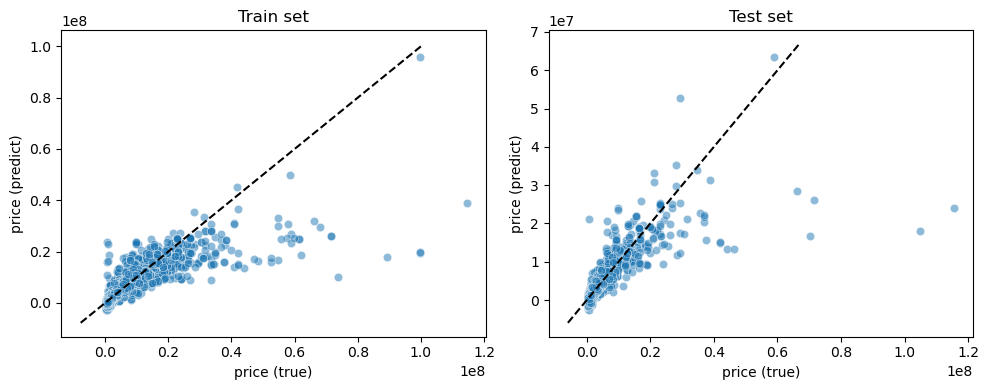

In [16]:
outputs = 'price'
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(
    x=y_train.ravel(),
    y=y_hat_train,
    ax=ax[0],
    alpha=0.5,
)

sns.scatterplot(
    x=y_test.ravel(),
    y=y_hat_test,
    ax=ax[1],
    alpha=0.5,
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')
    a.plot(a.get_ylim(), a.get_ylim(), ls='--', c='k')


    
ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

### train kernel ridge regression model

In [17]:
kernel_model = KernelRidge(alpha=1.0, kernel='linear')
kernel_model.fit(X_train, y_train)
y_hat_train_linear = kernel_model.predict(X_train)
y_hat_test_linear = kernel_model.predict(X_test)

### evaluate kernel ridge regression model

In [18]:
# calculate MAE, MSE, RMSE for train_data
print('train_MAE: ', metrics.mean_absolute_error(y_hat_train_linear, y_train))
print('train_MSE: ', metrics.mean_squared_error(y_hat_train_linear, y_train))
print('train_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_train_linear, y_train)))
print('score_train: ', regressor.score(X_train, y_train))

# calculate MAE, MSE, RMSE for test_data
print('test_MAE: ', metrics.mean_absolute_error(y_hat_test_linear, y_test))
print('test_MSE: ', metrics.mean_squared_error(y_hat_test_linear, y_test))
print('test_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_test_linear, y_test)))
print('score_test: ', regressor.score(X_test, y_test))


train_MAE:  1088405.7712295002
train_MSE:  6422652515559.098
train_RMSE:  2534295.2700029053
score_train:  0.719640690836158
test_MAE:  1140904.9844021334
test_MSE:  9638165306192.822
test_RMSE:  3104539.4676494002
score_test:  0.6364764513718336


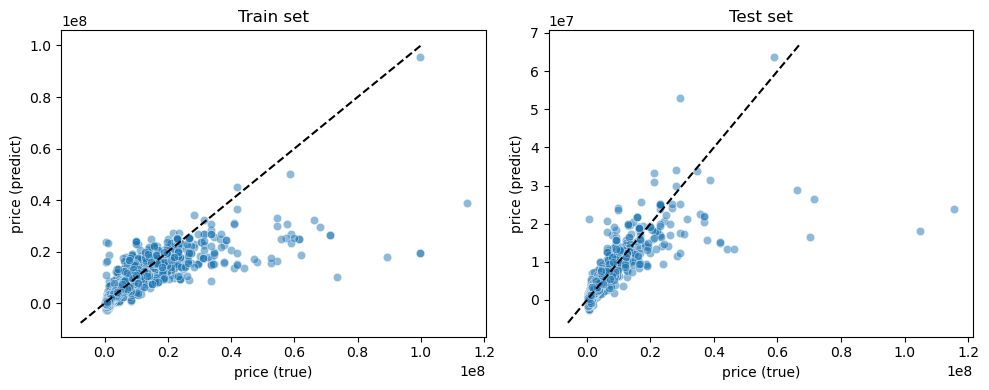

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(
    x=y_train.ravel(),
    y=y_hat_train_linear,
    ax=ax[0],
    alpha=0.5,
)

sns.scatterplot(
    x=y_test.ravel(),
    y=y_hat_test_linear,
    ax=ax[1],
    alpha=0.5,
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')
    a.plot(a.get_ylim(), a.get_ylim(), ls='--', c='k')

ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

### train polynomial kernel regression model

In [20]:
kernel_model = KernelRidge(alpha=1.0, kernel='polynomial', degree=3)
kernel_model.fit(X_train, y_train)
y_hat_train_polynomial = kernel_model.predict(X_train)
y_hat_test_polynomial = kernel_model.predict(X_test)

### evaluate polynomial kernel regression model

In [21]:
# calculate MAE, MSE, RMSE for train_data
print('train_MAE: ', metrics.mean_absolute_error(y_hat_train_polynomial, y_train))
print('train_MSE: ', metrics.mean_squared_error(y_hat_train_polynomial, y_train))
print('train_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_train_polynomial, y_train)))
print('score_train: ', regressor.score(X_train, y_train))

# calculate MAE, MSE, RMSE for test_data
print('test_MAE: ', metrics.mean_absolute_error(y_hat_test_polynomial, y_test))
print('test_MSE: ', metrics.mean_squared_error(y_hat_test_polynomial, y_test))
print('test_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_test_polynomial, y_test)))
print('score_test: ', regressor.score(X_test, y_test))


train_MAE:  594345.1937654758
train_MSE:  1915317865661.632
train_RMSE:  1383950.0950762755
score_train:  0.719640690836158
test_MAE:  757899.4125527164
test_MSE:  22461535884659.297
test_RMSE:  4739360.282217348
score_test:  0.6364764513718336


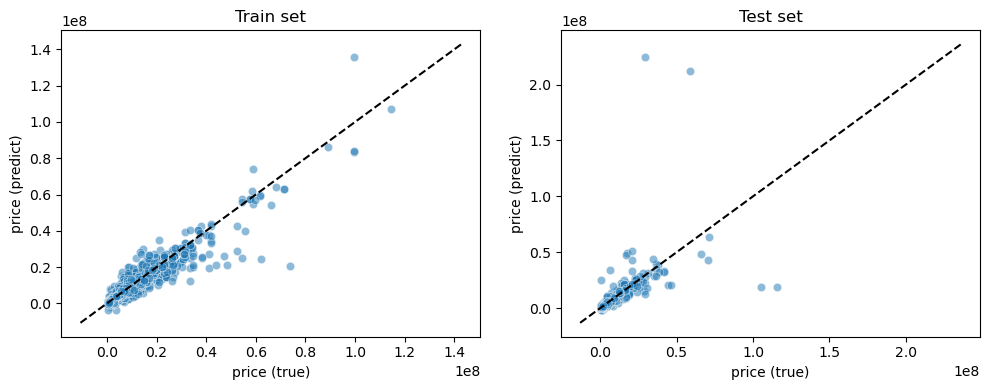

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(
    x=y_train.ravel(),
    y=y_hat_train_polynomial,
    ax=ax[0],
    alpha=0.5,
)

sns.scatterplot(
    x=y_test.ravel(),
    y=y_hat_test_polynomial,
    ax=ax[1],
    alpha=0.5,
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')
    a.plot(a.get_ylim(), a.get_ylim(), ls='--', c='k')


    
ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

### train RBF kernel regression model

In [23]:
kernel_model = KernelRidge(alpha=1.0, kernel='rbf', gamma=0.08)
kernel_model.fit(X_train, y_train)
y_hat_train_rbf = kernel_model.predict(X_train)
y_hat_test_rbf = kernel_model.predict(X_test)

### evaluate RBF kernel regression model

In [24]:
# calculate MAE, MSE, RMSE for train_data
print('train_MAE: ', metrics.mean_absolute_error(y_hat_train_rbf, y_train))
print('train_MSE: ', metrics.mean_squared_error(y_hat_train_rbf, y_train))
print('train_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_train_rbf, y_train)))
print('score_train: ', regressor.score(X_train, y_train))

# calculate MAE, MSE, RMSE for test_data
print('test_MAE: ', metrics.mean_absolute_error(y_hat_test_rbf, y_test))
print('test_MSE: ', metrics.mean_squared_error(y_hat_test_rbf, y_test))
print('test_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_test_rbf, y_test)))
print('score_test: ', regressor.score(X_test, y_test))


train_MAE:  801623.9426433988
train_MSE:  4496239773159.113
train_RMSE:  2120433.864368119
score_train:  0.719640690836158
test_MAE:  1466988.3235616395
test_MSE:  20767306889194.7
test_RMSE:  4557116.071507801
score_test:  0.6364764513718336


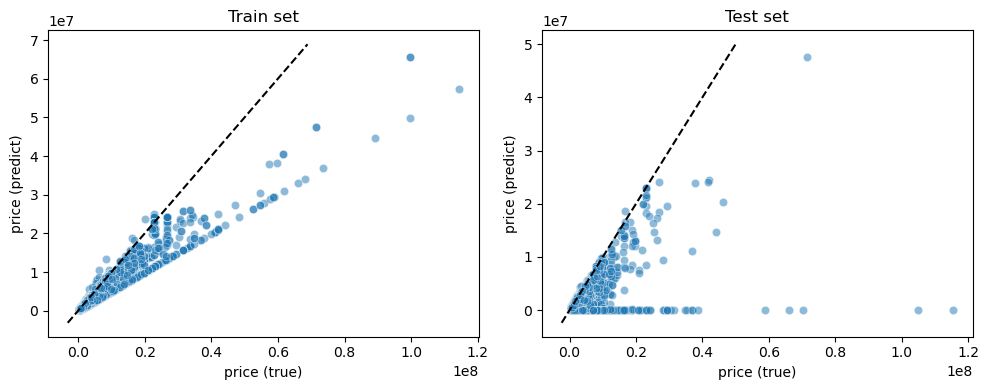

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(
    x=y_train.ravel(),
    y=y_hat_train_rbf,
    ax=ax[0],
    alpha=0.5,
)

sns.scatterplot(
    x=y_test.ravel(),
    y=y_hat_test_rbf,
    ax=ax[1],
    alpha=0.5,
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')
    a.plot(a.get_ylim(), a.get_ylim(), ls='--', c='k')

ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

### Standardize RBF attributes

In [27]:
normalized_data = preprocessing.StandardScaler()
train_rbf = pd.DataFrame(normalized_data.fit_transform(df_train_8[all_X_att_train]), index=df_train_8.index, columns=all_X_att_train)
test_rbf = pd.DataFrame(normalized_data.fit_transform(df_test_2[all_X_att_train]), index=df_test_2.index, columns=all_X_att_train)

X_train_rbf, X_test_rbf, y_train_rbf, y_test_rbf = train_rbf[all_X_att_train], test_rbf[all_X_att_train], df_train_8['price'], df_test_2['price']


### train RBF model with standardized data

In [28]:
kernel_model = KernelRidge(alpha=1.0, kernel='rbf', gamma=0.2)
kernel_model.fit(X_train_rbf, y_train_rbf)
y_hat_train_rbf = kernel_model.predict(X_train_rbf)
y_hat_test_rbf = kernel_model.predict(X_test_rbf)

In [29]:
# calculate MAE, MSE, RMSE for train_data
print('train_MAE: ', metrics.mean_absolute_error(y_hat_train_rbf, y_train_rbf))
print('train_MSE: ', metrics.mean_squared_error(y_hat_train_rbf, y_train_rbf))
print('train_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_train_rbf, y_train_rbf)))
print('score_train: ', regressor.score(X_train_rbf, y_train_rbf))

# calculate MAE, MSE, RMSE for test_data
print('test_MAE: ', metrics.mean_absolute_error(y_hat_test_rbf, y_test_rbf))
print('test_MSE: ', metrics.mean_squared_error(y_hat_test_rbf, y_test_rbf))
print('test_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_test_rbf, y_test_rbf)))
print('score_test: ', regressor.score(X_test_rbf, y_test_rbf))


train_MAE:  382745.1139598018
train_MSE:  2223479099855.485
train_RMSE:  1491133.4949814135
score_train:  -8830.535506303797
test_MAE:  631404.6575139113
test_MSE:  10725751243823.523
test_RMSE:  3275019.273809472
score_test:  -7629.047563753539


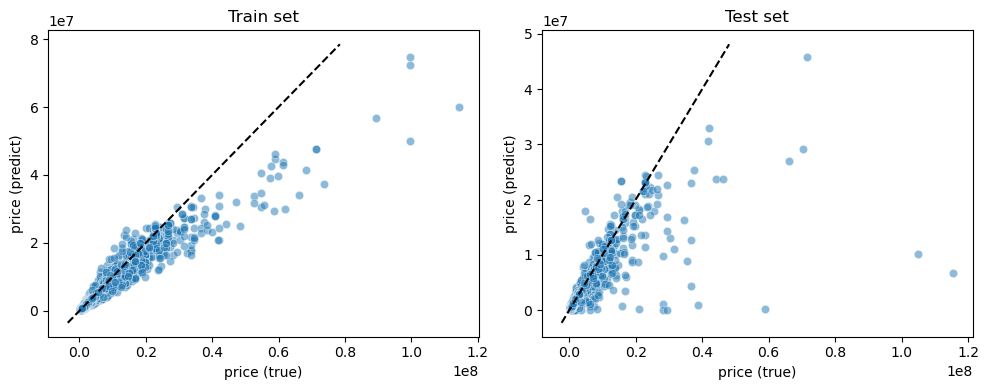

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(
    x=y_train_rbf.ravel(),
    y=y_hat_train_rbf,
    ax=ax[0],
    alpha=0.5,
)

sns.scatterplot(
    x=y_test_rbf.ravel(),
    y=y_hat_test_rbf,
    ax=ax[1],
    alpha=0.5,
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')
    a.plot(a.get_ylim(), a.get_ylim(), ls='--', c='k')

ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

## Model performance
* linear regression models show a similar large RMSE metric and from comparasion plot of precited price and groud-truth price, we can see linear models can basically catch price change directions but not very precisely.